In [1]:
#(1)veri seti incelemesi
#(2)makine ogrenmesi modelinin secilmesi-KNN sınıflandırıcı
#(3)modeli train edilmesi
#(4)sonucların degerlendirilmesi
#(5)hipermetre ayarlaması

Veri seti incelemesi

In [2]:
from sklearn.datasets import load_breast_cancer
#hazır veri seti(gogus kanseri)
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
#(1)veri seti incelemesi
cancer = load_breast_cancer()
df=pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["target"]=cancer.target

#(2)makine ogrenmesi modelinin secilmesi-KNN sınıflandırıcı


#(3)modeli train edilmesi

In [4]:
X = cancer.data #features
y = cancer.target #target

train test split

In [5]:
train_test_split(X,y,test_size=0.3, random_state = 42)#bu sekilde hiçbir şey anlaşılmadı hepsini bir degiskene atıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,random_state = 42)
# Bölünen verilerin boyutlarını görmek için shape özelliğini kullanın
print("X_train boyutu:", X_train.shape)
print("X_test boyutu:", X_test.shape)
print("y_train boyutu:", y_train.shape)
print("y_test boyutu:", y_test.shape)

X_train boyutu: (398, 30)
X_test boyutu: (171, 30)
y_train boyutu: (398,)
y_test boyutu: (171,)


Olceklendirme

In [6]:
#olceklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN modeli olustur ve train et

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)#model olusturma komsu parametrelerini neighbors ile belirleme
knn.fit(X_train, y_train) #fit fonksiyonu verimizi (samples + target) kullanarak knn algoritmasını egitir

KNeighborsClassifier(n_neighbors=3)

#(4)sonucların degerlendirilmesi

In [8]:
knn.predict(X) #bu mantıklı degil cunku hepsine bakamam
y_pred = knn.predict(X_test)#bir degiskene attık

In [9]:
accuracy = accuracy_score(y_test, y_pred)#gercek target degerleri ve tahmin edilen target degerleri arası dogrulugu hesaplıyor
print("Dogruluk:",accuracy)

Dogruluk: 0.9590643274853801


Confusion matrix, modelin doğru ve yanlış sınıflandırmalarını özetleyen bir tablodur.

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[ 59   4]
 [  3 105]]


Hiperparametre ayarlaması

1 0.9532163742690059
2 0.9532163742690059
3 0.9590643274853801
4 0.9649122807017544
5 0.9590643274853801
6 0.9590643274853801
7 0.9590643274853801
8 0.9649122807017544
9 0.9707602339181286
10 0.9707602339181286
11 0.9707602339181286
12 0.9707602339181286
13 0.9649122807017544
14 0.9649122807017544
15 0.9532163742690059
16 0.9649122807017544
17 0.9532163742690059
18 0.9590643274853801
19 0.9473684210526315
20 0.9532163742690059


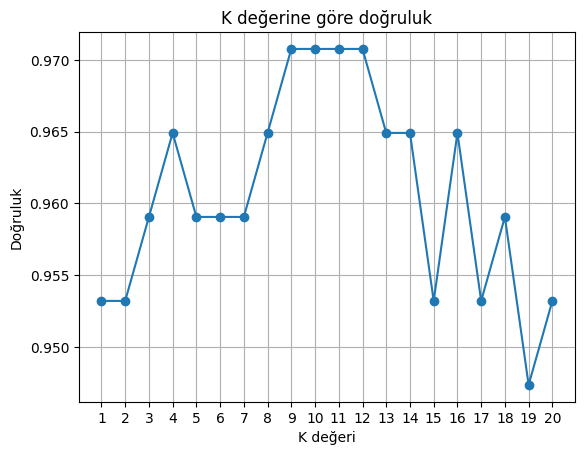

In [11]:
#modelin dogrulugunu arttırmak
accuracy_values = []
k_values = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)  # k değerini k_values listesine ekle
    print(k, accuracy)

plt.figure()
plt.plot(k_values, accuracy_values, marker="o", linestyle="-")
plt.title("K değerine göre doğruluk")
plt.xlabel("K değeri")
plt.ylabel("Doğruluk")
plt.xticks(k_values)
plt.grid(True)


NEW PROBLEMS!

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

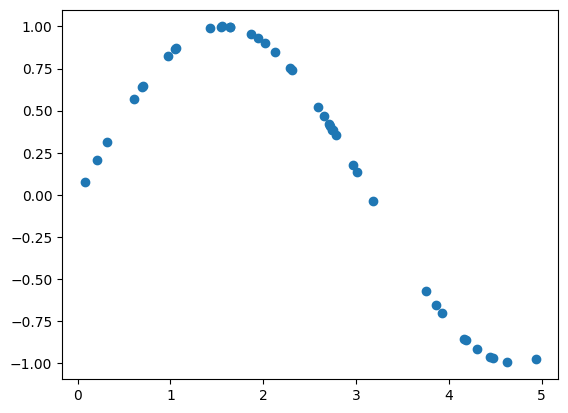

In [13]:
X =np.sort(5 * np.random.rand(40,1), axis= 0)#uniform random #features
y = np.sin(X).ravel() #target
plt.scatter(X,y)

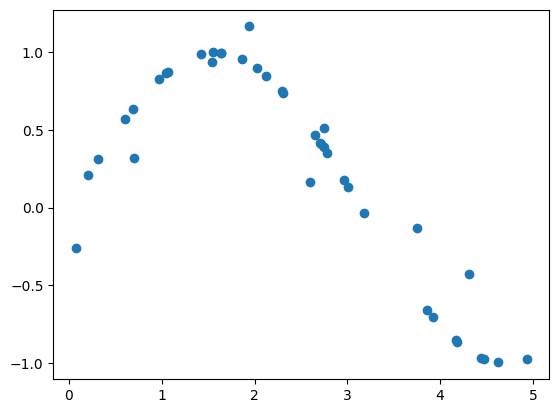

In [14]:
#add noise (gurultu ekle)
y[::5] += 1*(0.5 -np.random.rand(8))
plt.scatter(X,y)

In [15]:
T=np.linspace(0,5,500)[:,np.newaxis]

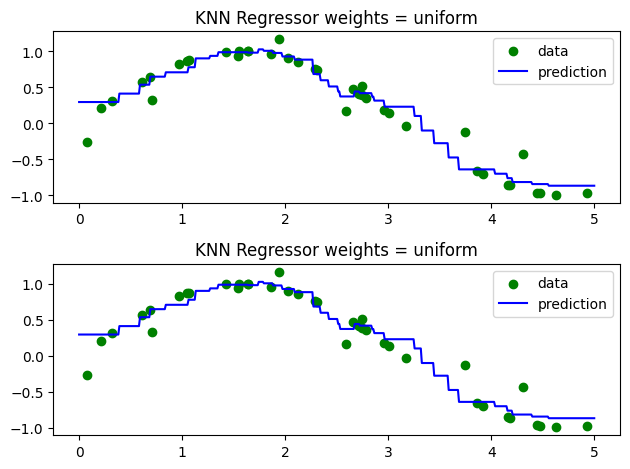

In [16]:
for i, weights in enumerate(["uniform", "distance"]):
    weights = "uniform"
    knn = KNeighborsRegressor(n_neighbors=5, weights=weights)
    y_pred = knn.fit(X,y).predict(T)

    plt.subplot(2,1,i+1)
    plt.scatter(X,y,color="green",label="data")
    plt.plot(T, y_pred,color="blue", label ="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNN Regressor weights = {}".format(weights))
plt.tight_layout()
plt.show()